## Sorting algorythms

In [1]:
row = 'sphynx of black quartz, judge my vow!'

### Select sort

In [2]:
def ss(a):
    for i in range(len(a)):
        m = a[i]           # Current minimum
        c = i
        for j in range(i+1,len(a)):
            if a[j]<m:     # Find smallest element
                m = a[j]
                c = j                
        if c>i:
            (a[i],a[c]) = (a[c],a[i])
    return a

''.join(ss(list(row)))

'      !,aabcdefghjklmnoopqrstuuvwxyyz'

### Quicksort

In [126]:
def qs(a):
    if len(a)<=1:
        return a
    n = len(a)-1               # Last element will be our pivot element (see footnote)
    l = 0                      # pointer to where small values will be shoved
    #print(''.join(a))
    for r in range(0,n):       # For each non-pivot
        #print(r,l,''.join(a))
        if a[r]<a[n]:          # If smaller than pivot,
            if r>l:            # and cannot be left in place,
                (a[r],a[l]) = (a[l],a[r]) # Swap (shove it to the left)
            l += 1             # Point to the next shoving point

    # By the end of this, all a<pivot are in locations<l
    # and all a>pivot (if any) are in l to n-1
    
    if l<n: # Typical case, when there are some elements >pivot
        (a[l],a[n]) = (a[n],a[l]) # Move pivot to its rightful place in the middle
        a = cs(a[:l]) + [a[l]] + cs(a[(l+1):]) # Do recursion on both halves
    else:
        a = cs(a[:l]) + [a[l]] # Unusual (and bad) case of pivot on the border
    return a

''.join(qs(list(row)))

'      !,aabcdefghjklmnoopqrstuuvwxyyz'

Footnote: actually choosing pivot smartly is a heuristic trick that helps to improve average performance of this algorithm. This version is the simplest and it works, but one can also try smarter approaches. Ideal pivot is ~median(array).

The best thing about quisort is that it's happening in-place, and so is light on memory, yet is also fast.

### Mergesort

In [123]:
def ms(a):
    if len(a)<=1:
        return a
    mid = len(a) // 2
    al = ms(a[:mid])
    ar = ms(a[mid:])
    i = j = 0
    o = []
    while (i<len(al)) or (j<len(ar)):
        if i>=mid:           # Left array is over, draw from the right
            o.append(ar[j])
            j += 1
        elif j>=len(ar):     # Right array is over, draf from the left
            o.append(al[i])
            i += 1
        elif al[i]<ar[j]:    # Both are fine: compare
            o.append(al[i])
            i += 1
        else:
            o.append(ar[j])
            j += 1
    return o
    
''.join(ms(list(row)))

'      !,aabcdefghjklmnoopqrstuuvwxyyz'

### Testing

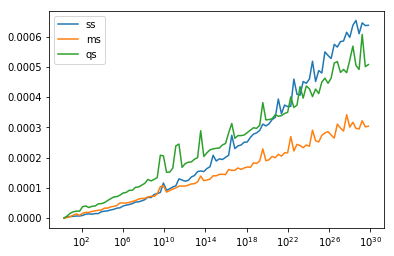

In [128]:
import matplotlib.pyplot as plt
import time
import numpy as np

nTrials = 1000

x = y = np.array([])
flist = [ss, ms, qs] # List of functions
for i in range(1,100):
    n = 2**i
    x = np.append(x,n)

    newRow = []
    for f in flist:
        t = 0
        for j in range(nTrials):
            task = np.random.randint(0,i,i)
            tic = time.time()
            f(task)
            t += time.time()-tic
        newRow.append(t/nTrials)
    y = np.append(y,newRow)
        
y = y.reshape([-1,3])
plt.plot(x,y);
plt.xscale('log');
plt.legend(['ss','ms','qs']);